In [1]:
# Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

# Q2. Load the Wine Quality dataset and explore its dimensions.
# Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

# Q3. Check for null values, identify categorical variables, and encode them.

# Q4. Separate the features and target variables from the dataframe.

# Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

# Q6. Perform scaling on the dataset.

# Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

# Q8. Create a Sequential model and add all the layers to it.

# Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

# Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if 
# no improvement is observed.

# Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during 
# training.

# Q12. Print the model summary.

# Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

# Q14. Compile the model with the specified loss function, optimizer, and metrics.

# Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint 
# callbacks.

# Q16. Get the model's parameters.

# Q17. Store the model's training history as a Pandas DataFrame.

# Q18. Plot the model's training history.

# Q19. Evaluate the model's performance using the test data.

In [6]:
# Install the latest versions of TensorFlow and Keras
!pip install tensorflow

In [9]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.13.0
Keras version: 2.13.1


In [10]:
# Load the Wine Quality Dataset and Explore its Dimensions

import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_df = pd.read_csv(url, sep=';')

# Explore the dimensions of the dataset
print("Dataset dimensions:", wine_df.shape)


Dataset dimensions: (4898, 12)


In [11]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [13]:
# Check for Null Values, Identify Categorical Variables, and Encode Them

# Check for null values
print("Null values:\n", wine_df.isnull().sum())


Null values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [21]:

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Assuming 'Color' is your categorical feature in a DataFrame 'df'
wine_df['quality'] = label_encoder.fit_transform(wine_df['quality'])

# 'Color_encoded' will now contain the label-encoded values


In [22]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,3
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,3
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,3
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,3
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,3
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,2
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,3
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,4


In [15]:
wine_df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [24]:
# Encode categorical variables (convert them to numeric using one-hot encoding)
wine_df_encoded = pd.get_dummies(wine_df, columns=['quality'], drop_first=True)

In [25]:
wine_df_encoded

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0,0,1,0,0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0,0,1,0,0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,0,1,0,0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,0,1,0,0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,0,1,0,0,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,1,0,0,0,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,0,1,0,0,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,0,0,1,0,0


In [29]:
# Separate features and target
X = wine_df_encoded.drop(columns=['quality_1', 'quality_2', 'quality_3', 'quality_4', 'quality_5', 'quality_6'])
y = wine_df_encoded[['quality_1', 'quality_2', 'quality_3', 'quality_4', 'quality_5', 'quality_6']]


In [30]:
# train-test split and divide the data into training, validation, and test datasets:
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now you have X_train, y_train for training, X_val, y_val for validation, and X_test, y_test for testing.


In [31]:
# Perform scaling on the dataset:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training, validation, and test data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [37]:
X_train_scaled.shape

(3428, 11)

In [46]:
#  Create a Sequential model and add all the layers to it:
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = keras.Sequential()

# Add hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))

# Add the output layer for binary classification (assuming 2 classes)
model.add(Dense(units=6, activation='softmax'))


In [47]:
# Implement a TensorBoard callback to visualize and monitor the model's training process:
from tensorflow.keras.callbacks import TensorBoard

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1, write_graph=True, write_images=True)


In [48]:
# Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if no improvement is observed:
from tensorflow.keras.callbacks import EarlyStopping

# Create an EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [49]:
#  Implement a ModelCheckpoint callback to save the best model based on a chosen metric during training:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a ModelCheckpoint callback
model_checkpoint_callback = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)


In [50]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 6)                 198       
                                                                 
Total params: 3046 (11.90 KB)
Trainable params: 3046 (11.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
# Assuming 'binary_crossentropy' as the loss function for binary classification
loss_function = 'binary_crossentropy'

# Assuming 'adam' as the optimizer
optimizer = 'adam'

# Metrics to monitor during training
metrics = ['accuracy']


In [52]:
# Compile the model
model.compile(loss=loss_function, optimizer=optimizer, metrics=metrics)


In [53]:
# Define the number of epochs and batch size
epochs = 40
batch_size = 32

# Fit the model with callbacks
history = model.fit(
    X_train_scaled, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_scaled, y_val),
    callbacks=[tensorboard_callback, early_stopping_callback, model_checkpoint_callback]
)


Epoch 1/40
108/108 [==============================] - 2s 7ms/step - loss: 0.4848 - accuracy: 0.3468 - val_loss: 0.3474 - val_accuracy: 0.4884
Epoch 2/40
 92/108 [========================>.....] - ETA: 0s - loss: 0.3286 - accuracy: 0.5241

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


108/108 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.5289 - val_loss: 0.3229 - val_accuracy: 0.5197
Epoch 3/40
108/108 [==============================] - 0s 3ms/step - loss: 0.3127 - accuracy: 0.5440 - val_loss: 0.3141 - val_accuracy: 0.5293
Epoch 4/40
108/108 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.5493 - val_loss: 0.3103 - val_accuracy: 0.5279
Epoch 5/40
108/108 [==============================] - 0s 3ms/step - loss: 0.3003 - accuracy: 0.5595 - val_loss: 0.3088 - val_accuracy: 0.5415
Epoch 6/40
108/108 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.5645 - val_loss: 0.3067 - val_accuracy: 0.5456
Epoch 7/40
108/108 [==============================] - 0s 3ms/step - loss: 0.2944 - accuracy: 0.5630 - val_loss: 0.3068 - val_accuracy: 0.5293
Epoch 8/40
108/108 [==============================] - 0s 3ms/step - loss: 0.2924 - accuracy: 0.5703 - val_loss: 0.3046 - val_accuracy: 0.5483
Epoch 9/40
108/10

In [55]:
# Get the model's parameters (weights)
model_weights = model.get_weights()
model_weights

[array([[-3.28642845e-01,  1.77654445e-01, -2.89543942e-02,
          2.85565615e-01,  1.88975111e-01, -1.77106380e-01,
          6.04533143e-02, -5.05786985e-02, -1.61845446e-01,
         -3.09779376e-01, -4.69627351e-01, -2.90752053e-01,
         -3.22718650e-01, -7.35314041e-02, -2.03105241e-01,
         -4.60705489e-01, -3.20557564e-01, -1.95261464e-01,
         -1.69229358e-01, -1.31632715e-01,  1.16486691e-01,
          3.34398329e-01,  1.54187754e-01, -2.21987560e-01,
         -2.23769262e-01,  1.07046887e-01, -2.91096389e-01,
          3.42360705e-01,  2.58996040e-02,  2.28466824e-01,
         -2.09150329e-01, -4.54246216e-02, -3.62262987e-02,
          1.09264232e-01, -9.39031690e-02,  2.73332954e-03,
         -1.09985873e-01, -9.39380974e-02,  3.37174445e-01,
          1.77993730e-01,  1.97898820e-01, -3.92891131e-02,
          4.85570095e-02, -6.05348945e-02, -1.89007431e-01,
         -1.86098933e-01, -1.48578614e-01, -4.02964771e-01,
         -1.63864270e-01, -5.63978255e-0

In [56]:
import pandas as pd

# Create a DataFrame from the training history
history_df = pd.DataFrame(history.history)


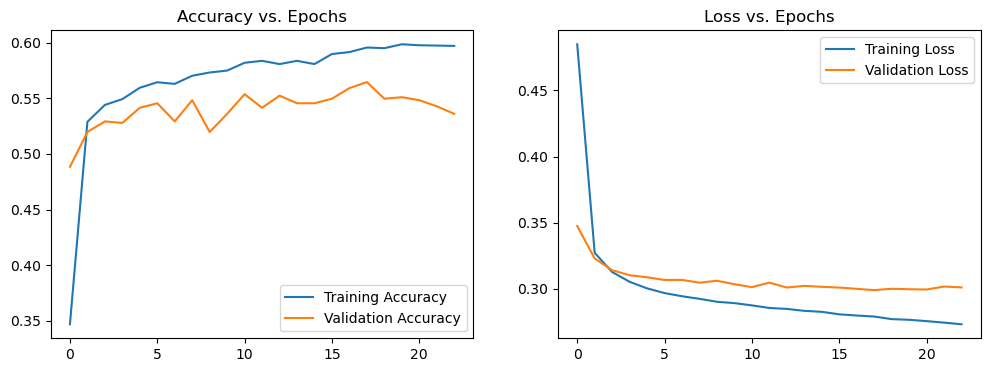

In [57]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss vs. Epochs')

plt.show()


In [58]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


23/23 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.5905
Test Loss: 0.2827506959438324
Test Accuracy: 0.5904762148857117
